This generates a Extended Data Figure illustrating ...

* Identification of grid cells with grid scores
* Examples of grid cell firing rate maps
* Number of grid cells per mouse
* Number of grid cells per session



In [1]:
%load_ext autoreload
%autoreload 2

%run ../../setup_project.py
%run ../../generic_plot_functions.py

import os.path
import shutil
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath=PROJECT_DATA_PATH,dlcModelPath="")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt/
dlcModelPath: 
Reading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


In [2]:
fn = myProject.dataPath+"/results/cells.csv"
print("Loading", fn)
cells = pd.read_csv(fn)

fn=myProject.dataPath+"/results/myMaps.pickle"
print("Loading",fn)
with open(fn, 'rb') as fp: 
    myMaps = pickle.load(fp)


fn = myProject.dataPath+"/results/assignment_gridScore.csv"
print("Loading",fn)
dfGridScore = pd.read_csv(fn)


Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/cells.csv


Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/myMaps.pickle
Loading /ext_drives/d91/data/projects/jingjie/Peng_et.al_2025_noInt//results/assignment_gridScore.csv


## Data on the grid cells recorded in this study

In [3]:
dfUsable = cells[cells.usable==True]
dfGridUsable = dfGridScore[(dfGridScore.cluId.isin(dfUsable.cluId)) & (dfGridScore.shuffling==False)]

In [4]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['#6930C3','#4EA8DE','#80FFDB']

colorGrad = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

In [5]:
def plotGridScoreDistribution(ax,df):
    """
    Scatterplot with the distribution of grid scores
    
    df should be a dataset with the cell you want to show, should have a gridScore and trialCode columns, without shuffling
    
    """
    dfSel = df[df.trialCode=="circ80_0"]
    
    sns.histplot(data=dfSel, x="gridScore",color="#5E60CE",edgecolor='none')

    ax.set_ylabel("Neurons")
    ax.set_xlabel("Grid scores")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
def plotGridScoreTwoRFs(ax,df):
    """
    Plot the grid scores for RF1 and RF2
    
    df should be a dataset with the cell you want to show, should have a gridScore and trialCode columns, without shuffling
    
    """
    grid0 = df[df.trialCode=="circ80_0"].gridScore
    grid1 = df[df.trialCode=="circ80_1"].gridScore
    
    ax.scatter(grid0,grid1,s=2,alpha=0.2,color="#48BFE3")
    ax.set_xlim(-0.5,1.7)
    ax.set_ylim(-0.5,1.7)
    ax.set_xticks(np.linspace(-0.5,1.5,3))
    ax.set_yticks(np.linspace(-0.5,1.5,3))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    
    ax.set_xlabel("Grid score RF1")
    
    ax.set_ylabel("Grid score RF2")

def plotGridCellsPerMouse(ax,df):
    """
    df is cells dataframe
    """
    
    gcells = df[df.gridCell_FIRST==True]
    gcCounts = gcells.mouse.value_counts()
    gcCounts.index,gcCounts.values
    
    ax.bar(gcCounts.index,gcCounts.values,color=sns.color_palette(), edgecolor = "black")
    ax.set_ylabel("Grid cells")
    ax.set_xlabel("Mouse")

    ax.tick_params(axis='x', rotation=90,labelsize=7)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
def plotGridCellsPerSession(ax,df):
    """
    df is cells dataframe
    """
    
    gcells = df[df.gridCell_FIRST==True]
    gcCounts = gcells.session.value_counts()
    dfNew = pd.DataFrame({"session":gcCounts.index,
                         "gridCells":gcCounts.values})
    
    sns.histplot(data=dfNew, x="gridCells",color="#56CFE1")
    ax.set_ylabel("Rec. sessions")
    ax.set_xlabel("Grid cells")
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    
def plotGridCellSeaborn(ax,df):
    
    gcells = df[df.gridCell_FIRST==True]
    gcCounts = gcells.mouse.value_counts()

    pal = [colorGrad(i) for i in np.linspace(0, 1, 17)]
    # Create a barplot
    b = sns.barplot(x=gcCounts.index, y=gcCounts.values, palette=pal,ax=ax)

    # Set labels and title
    ax.set_ylabel("Grid cells")
    ax.set_xlabel("Mouse")
    ax.tick_params(axis='x', rotation=90,labelsize=10)
    b.set_xlim(left=-0.7)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  

In [6]:
def plotGridStats(spec):
    
    statSpec = gridspec.GridSpecFromSubplotSpec(ncols=4, nrows=1,width_ratios=[0.9,0.9,1.3,0.9],
                                               subplot_spec=spec[0])
    
    ax = fig.add_subplot(statSpec[0])
    plotGridScoreDistribution(ax,dfGridUsable)

    ax = fig.add_subplot(statSpec[1])
    plotGridScoreTwoRFs(ax,dfGridUsable)

    ax = fig.add_subplot(statSpec[2])
    plotGridCellSeaborn(ax,cells)

    ax = fig.add_subplot(statSpec[3])
    plotGridCellsPerSession(ax,cells)


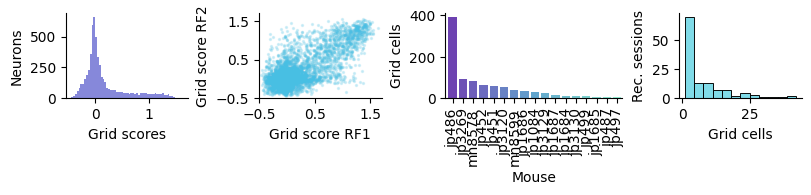

In [7]:
rowSize,colSize= 1.8,2.0 #figurePanelDefaultSize()
ncols=4
nrows=1
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure.
mainSpec = fig.add_gridspec(ncols=1, nrows=1) # to be passed to a drawing function, one row and one column, in this case covering the entire figure but does not have to be.


plotGridStats(mainSpec)

In [8]:
cells.gridCell_FIRST.sum()

931

## Show a random selection of grid cells

In [9]:
cells

,cluId,session,mouse,refractory,refractoryClean,usable,meanRate,sumShortAuto,meanRateStable,gridCell_AND,gridCell_OR,gridCell_FIRST,gridCell,leverCell_all_light,leverCell_all_dark
0,mn8578-30112021-0107_20,mn8578-30112021-0107,mn8578,0.243530,False,False,21.217267,133706.0,True,False,False,False,False,False,True
1,mn8578-30112021-0107_22,mn8578-30112021-0107,mn8578,0.441146,False,False,11.061320,104135.0,True,False,False,False,False,True,True
2,mn8578-30112021-0107_45,mn8578-30112021-0107,mn8578,0.196557,False,False,0.963276,7159.0,False,False,False,False,False,False,False
3,mn8578-30112021-0107_48,mn8578-30112021-0107,mn8578,0.065669,True,False,1.584928,5284.0,False,False,False,False,False,False,False
4,mn8578-30112021-0107_57,mn8578-30112021-0107,mn8578,0.381490,False,False,1.775738,2381.0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,jp499-25052023-0108_523,jp499-25052023-0108,jp499,0.174846,False,False,3.207400,11883.0,False,False,False,False,False,False,False
10846,jp499-25052023-0108_528,jp499-25052023-0108,jp499,0.113294,True,True,9.156873,43042.0,True,False,False,False,False,True,False
10847,jp499-25052023-0108_530,jp499-25052023-0108,jp499,0.040815,True,True,16.113786,150607.0,True,False,False,False,False,False,False
10848,jp499-25052023-0108_533,jp499-25052023-0108,jp499,0.086744,True,True,6.204651,25186.0,True,False,False,False,False,True,False


In [10]:
def plot_grid_cell_examples(spec,myMaps,ncols=6,nrows=6):
    """
    Function to plot the firing rate maps of randomly selected grid cells
    
    6x6 grid
    
    Arguments:
    spec: A spec with one col and one row on which you want to place the examples maps
    myMap: dictionary with the maps
    
    """
    mapSpec = gridspec.GridSpecFromSubplotSpec(ncols=ncols, nrows=nrows,
                                               subplot_spec=spec[0])
    
    # Get random grid cells
    n=ncols*nrows
    exampleCells = cells[(cells.gridCell_AND==True)].sample(n=n,random_state=2)
    exampleIndex = exampleCells.index
    
    condition="circ80_1"
    for i,index in enumerate(exampleIndex):
        x = int(i/ncols)
        y = int(i%ncols)
        
        ax = fig.add_subplot(mapSpec[x,y]) # add an axes to the figure
        m = myMaps[condition][index,0:-1,0:-1]
        plotMap(ax,m,title="",titleY=0.95,titleFontSize=8,cmap = 'viridis')
        title = "{:.1f} Hz".format(np.nanmax(m))
        
        ax.text(m.shape[0]/2, m.shape[1]+1, title,fontsize=7,horizontalalignment='center',verticalalignment='center',)
            
        # arena
        x = np.cos(np.linspace(0,2*np.pi,100))*40/3 + m.shape[0]/2
        y = np.sin(np.linspace(0,2*np.pi,100))*40/3 + m.shape[1]/2
        ax.plot(x,y, "--",color="grey", alpha=0.5)

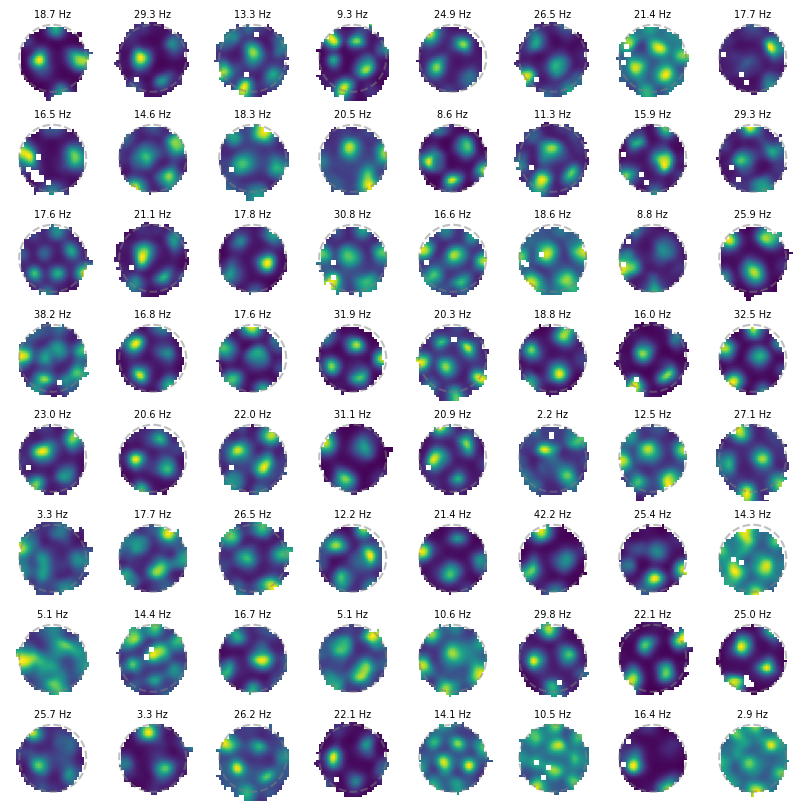

In [11]:
rowSize,colSize= 1.0,1.0 #figurePanelDefaultSize()
ncols=8
nrows=8
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure.
mainSpec = fig.add_gridspec(ncols=1, nrows=1) # to be passed to a drawing function, one row and one column, in this case covering the entire figure but does not have to be.

plot_grid_cell_examples(mainSpec,myMaps,ncols=ncols,nrows=nrows)

In [12]:
clu_table_path = myProject.dataPath+"/results/clu_table.csv"
clu_table = pd.read_csv(clu_table_path)

In [13]:
cells_clu=cells.merge(right = clu_table, on=['cluId','session'], how='left')
cells_clu

,cluId,session,mouse,refractory,refractoryClean,usable,meanRate,sumShortAuto,meanRateStable,gridCell_AND,gridCell_OR,gridCell_FIRST,gridCell,leverCell_all_light,leverCell_all_dark,Unnamed: 0,channel,shank,hemisphere,iso_distance
0,mn8578-30112021-0107_20,mn8578-30112021-0107,mn8578,0.243530,False,False,21.217267,133706.0,True,False,False,False,False,False,True,0,41,2,right,35.464774
1,mn8578-30112021-0107_22,mn8578-30112021-0107,mn8578,0.441146,False,False,11.061320,104135.0,True,False,False,False,False,True,True,1,22,1,right,NaN
2,mn8578-30112021-0107_45,mn8578-30112021-0107,mn8578,0.196557,False,False,0.963276,7159.0,False,False,False,False,False,False,False,2,28,1,right,34.586683
3,mn8578-30112021-0107_48,mn8578-30112021-0107,mn8578,0.065669,True,False,1.584928,5284.0,False,False,False,False,False,False,False,3,15,0,right,NaN
4,mn8578-30112021-0107_57,mn8578-30112021-0107,mn8578,0.381490,False,False,1.775738,2381.0,True,False,False,False,False,False,False,4,57,3,right,29.075118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,jp499-25052023-0108_523,jp499-25052023-0108,jp499,0.174846,False,False,3.207400,11883.0,False,False,False,False,False,False,False,43,81,1,right,16.582275
10846,jp499-25052023-0108_528,jp499-25052023-0108,jp499,0.113294,True,True,9.156873,43042.0,True,False,False,False,False,True,False,44,108,0,right,13.650591
10847,jp499-25052023-0108_530,jp499-25052023-0108,jp499,0.040815,True,True,16.113786,150607.0,True,False,False,False,False,False,False,45,122,0,right,21.423688
10848,jp499-25052023-0108_533,jp499-25052023-0108,jp499,0.086744,True,True,6.204651,25186.0,True,False,False,False,False,True,False,46,108,0,right,21.266926


In [14]:
import matplotlib.patches as mpatches

selection='gridCell_FIRST'
allcells=cells_clu[(cells_clu.usable==True)]
gc=cells_clu[(cells_clu.usable==True)&(cells_clu[selection]==True)]

def plot_iso_distance(ax):
    ax=sns.histplot(allcells.iso_distance, stat='density', log_scale=(True, False), fill=False,color='#2b2d42', cumulative=False, kde=False, element='step',bins=20)
    medianAll = np.nanmedian(allcells.iso_distance)

    ax.set_xlabel('Isolation distance')
    ax.set_ylabel('Density')

    sns.histplot(gc.iso_distance, stat='density', log_scale=(True, False), fill=False,color='#ef233c', cumulative=False, kde=False, element='step',bins=20)
    medianGrid = np.nanmedian(gc.iso_distance)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    ax.set_ylim(0,3)
    
def add_legend(ax):
    patches = [mpatches.Patch(color=['#2b2d42','#ef233c'][x], ec='white', label=l) for x,l in enumerate(["All cells", "Grid cells"])]
    ax.legend(handles=patches, loc='upper center', frameon=False, fontsize=12, bbox_to_anchor=(1.1,1.3))

In [15]:
def plotGridStatsWithIso(spec):
    
    statSpec = gridspec.GridSpecFromSubplotSpec(ncols=5, nrows=1,width_ratios=[0.9,0.9,1.6,0.9,0.9],
                                               subplot_spec=spec[0])
    
    
    ax = fig.add_subplot(statSpec[0])
    plotGridScoreDistribution(ax,dfGridUsable)

    ax = fig.add_subplot(statSpec[1])
    plotGridScoreTwoRFs(ax,dfGridUsable)

    ax = fig.add_subplot(statSpec[2])
    plotGridCellSeaborn(ax,cells)

    ax = fig.add_subplot(statSpec[3])
    plotGridCellsPerSession(ax,cells)
    
    ax = fig.add_subplot(statSpec[4])
    plot_iso_distance(ax)
    
    

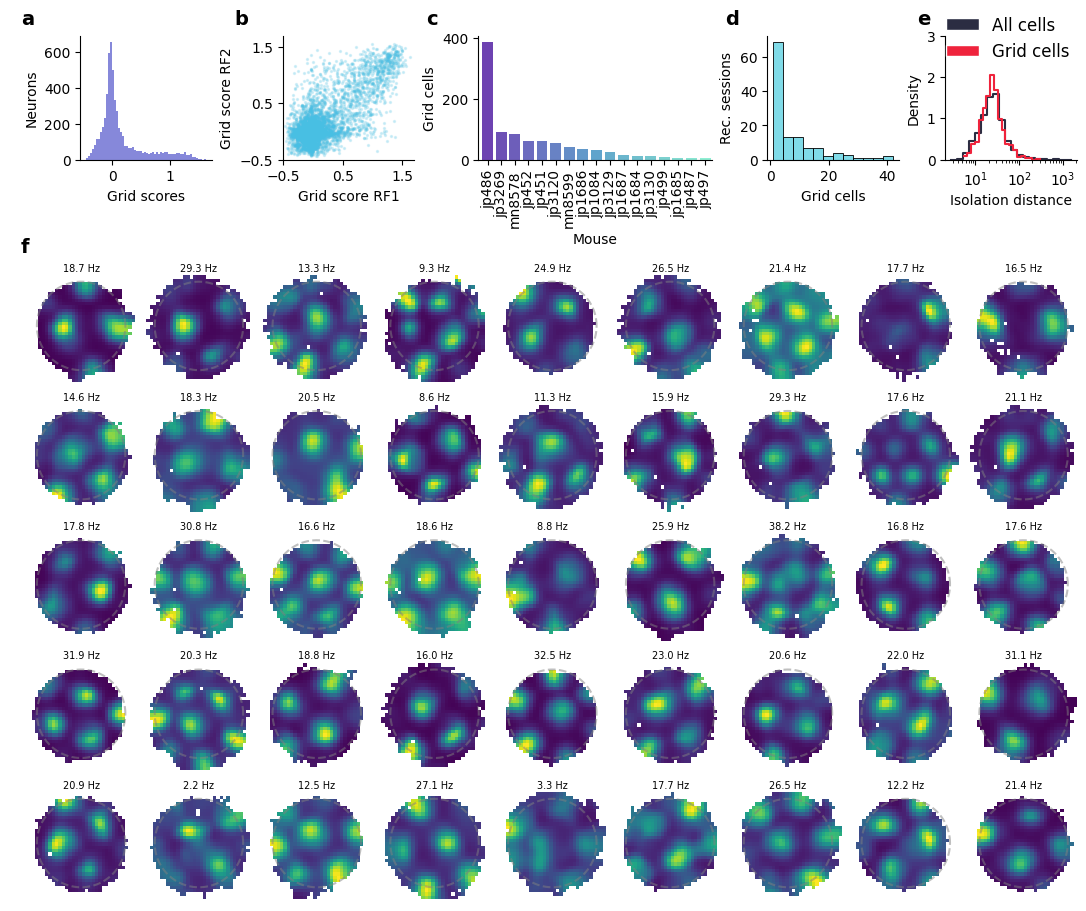

In [17]:
rowSize,colSize= 1.8,2.15 #figurePanelDefaultSize()
ncols=5
nrows=5
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure.
mainSpec = fig.add_gridspec(ncols=2, nrows=4,
                           height_ratios = [0.01,1.4,0.05,4],
                           width_ratios = [0.01,1])  




# stats
statsSpec = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1,
                                             subplot_spec=mainSpec[1,1])
plotGridStatsWithIso(statsSpec)

# maps
mapSpec = gridspec.GridSpecFromSubplotSpec(ncols=1, nrows=1,
                                               subplot_spec=mainSpec[3,1])
plot_grid_cell_examples(mapSpec,myMaps,ncols=9,nrows=5)

# letters

ax = fig.add_subplot(mainSpec[:,:])
ax.text(0.01, 1.0, "a",style="normal", fontsize=14, weight="bold")
ax.text(0.21, 1.0, "b",style="normal", fontsize=14, weight="bold")
ax.text(0.39, 1.0, "c",style="normal", fontsize=14, weight="bold")
ax.text(0.67, 1.0, "d",style="normal", fontsize=14, weight="bold")
ax.text(0.85, 1.0, "e",style="normal", fontsize=14, weight="bold")
ax.text(0.01, 0.74, "f",style="normal", fontsize=14, weight="bold")
ax.axis("off")

#Add legend
gs1 = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=mainSpec[:,:])
ax1 = fig.add_subplot(gs1[0,0])
add_legend(ax1)
ax1.axis('off')

plt.savefig('../../Output/Ext_Figure4.jpg', bbox_inches='tight', dpi=300)